In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d28d638edcb077e273cd997ef48e9bcf


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d28d638edcb077e273cd997ef48e9bcf&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
city_weather.status_code

200

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":62.78,"feels_like":61.57,"temp_min":56.32,"temp_max":66.15,"pressure":1019,"humidity":60},"visibility":10000,"wind":{"speed":8.05,"deg":350},"clouds":{"all":0},"dt":1662089491,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1662026974,"sunset":1662074361},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 62.78,
  'feels_like': 61.57,
  'temp_min': 56.32,
  'temp_max': 66.15,
  'pressure': 1019,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 350},
 'clouds': {'all': 0},
 'dt': 1662089491,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1662026974,
  'sunset': 1662074361},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 62.78,
  'feels_like': 61.57,
  'temp_min': 56.32,
  'temp_max': 66.15,
  'pressure': 1019,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 350},
 'clouds': {'all': 0},
 'dt': 1662089491,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1662026974,
  'sunset': 1662074361},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data.
boston_data = city_weather.json()

In [21]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1662026974,
 'sunset': 1662074361}

In [22]:
boston_data['sys']["country"]


'US'

In [23]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 66.15 60 0 8.05


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 9, 2, 3, 31, 31)

In [25]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-09-02 03:31:31'

In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [27]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | rodrigues alves
Processing Record 4 of Set 1 | necochea
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | acari
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | ranau
Processing Record 23 of Set 1 | port alfre

Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | vanavara
Processing Record 44 of Set 4 | tura
Processing Record 45 of Set 4 | san patricio
Processing Record 46 of Set 4 | svetlogorsk
Processing Record 47 of Set 4 | kuybysheve
Processing Record 48 of Set 4 | simao
Processing Record 49 of Set 4 | bredy
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | palu
Processing Record 2 of Set 5 | shingu
Processing Record 3 of Set 5 | hofn
Processing Record 4 of Set 5 | leh
Processing Record 5 of Set 5 | lemesos
City not found. Skipping...
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of Set 5 | hohhot
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | karachi
Processing Record 10 of Set 5 | zhanaozen
Processing Record 11 of Set 5 | wewak
Processing Record 12 of Set 5 | honiton
Processing Record 13 of Set 5 | beni suef
P

Processing Record 28 of Set 8 | honiara
Processing Record 29 of Set 8 | teya
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | abbeville
Processing Record 32 of Set 8 | sept-iles
Processing Record 33 of Set 8 | shambu
Processing Record 34 of Set 8 | provins
Processing Record 35 of Set 8 | nara
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | roebourne
Processing Record 38 of Set 8 | santarem
Processing Record 39 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 40 of Set 8 | krasnovishersk
Processing Record 41 of Set 8 | skibbereen
Processing Record 42 of Set 8 | natal
Processing Record 43 of Set 8 | lae
Processing Record 44 of Set 8 | gamba
Processing Record 45 of Set 8 | bumba
Processing Record 46 of Set 8 | longyearbyen
Processing Record 47 of Set 8 | nyimba
Processing Record 48 of Set 8 | saint-pierre
Processing Record 49 of Set 8 | vila
Processing Record 50 of Set 8 | wajima
Processing Record 1 of Set 9 | kamenk

Processing Record 17 of Set 12 | foumban
Processing Record 18 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 19 of Set 12 | peniche
Processing Record 20 of Set 12 | kalevala
Processing Record 21 of Set 12 | kulykiv
Processing Record 22 of Set 12 | kijang
Processing Record 23 of Set 12 | burica
City not found. Skipping...
Processing Record 24 of Set 12 | la ronge
Processing Record 25 of Set 12 | caconda
Processing Record 26 of Set 12 | bua yai
Processing Record 27 of Set 12 | qandala
Processing Record 28 of Set 12 | matola
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | pandamatenga
Processing Record 31 of Set 12 | maneadero
Processing Record 32 of Set 12 | alotau
City not found. Skipping...
Processing Record 33 of Set 12 | worthington
Processing Record 34 of Set 12 | ascension
Processing Record 35 of Set 12 | jiddah
City not found. Skipping...
Processing Record 36 of Set 12 | los llanos de aridane
Processing Record 37 of Set 12 | yunj

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,84.18,71,20,16.11,US,2022-09-02 03:35:06
1,Avarua,-21.2078,-159.7750,78.85,83,75,6.91,CK,2022-09-02 03:35:06
2,Rodrigues Alves,-7.7380,-72.6509,74.46,65,66,1.92,BR,2022-09-02 03:35:07
3,Necochea,-38.5473,-58.7368,47.39,83,92,15.88,AR,2022-09-02 03:35:07
4,Georgetown,5.4112,100.3354,87.89,78,40,7.00,MY,2022-09-02 03:34:16
5,Bredasdorp,-34.5322,20.0403,47.28,91,3,5.39,ZA,2022-09-02 03:35:07
6,Tasiilaq,65.6145,-37.6368,41.16,68,100,3.89,GL,2022-09-02 03:35:08
7,Albany,42.6001,-73.9662,57.63,77,0,4.83,US,2022-09-02 03:35:08
8,Mar Del Plata,-38.0023,-57.5575,48.94,87,0,15.01,AR,2022-09-02 03:34:17
9,Hithadhoo,-0.6000,73.0833,81.73,72,8,17.58,MV,2022-09-02 03:35:08


In [29]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-09-02 03:35:06,22.0752,-159.3190,84.18,71,20,16.11
1,Avarua,CK,2022-09-02 03:35:06,-21.2078,-159.7750,78.85,83,75,6.91
2,Rodrigues Alves,BR,2022-09-02 03:35:07,-7.7380,-72.6509,74.46,65,66,1.92
3,Necochea,AR,2022-09-02 03:35:07,-38.5473,-58.7368,47.39,83,92,15.88
4,Georgetown,MY,2022-09-02 03:34:16,5.4112,100.3354,87.89,78,40,7.00
...,...,...,...,...,...,...,...,...,...
559,Awjilah,LY,2022-09-02 03:37:25,29.1081,21.2869,77.95,55,0,6.46
560,Cadereyta,MX,2022-09-02 03:37:25,25.5833,-99.9833,85.17,65,96,4.43
561,Kinablangan,PH,2022-09-02 03:37:25,7.6947,126.5503,87.96,65,96,11.27
562,Madimba,TZ,2022-09-02 03:37:25,-10.4000,40.3333,67.32,77,20,23.02


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1662090689.1197984

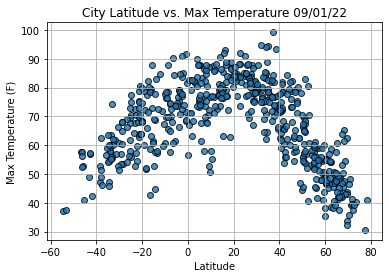

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

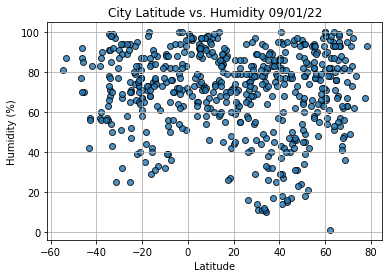

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

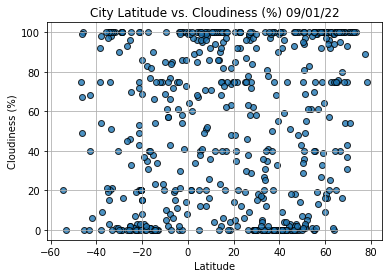

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

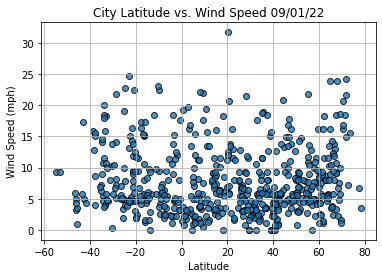

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

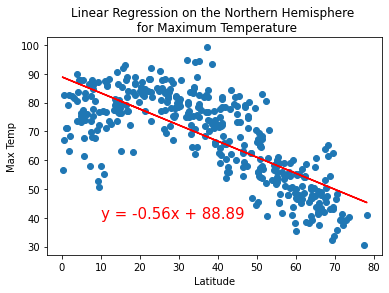

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

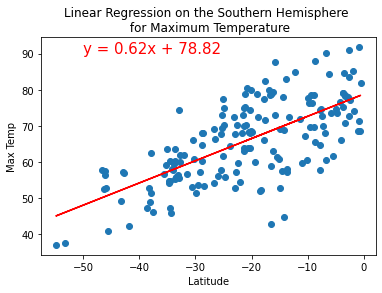

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

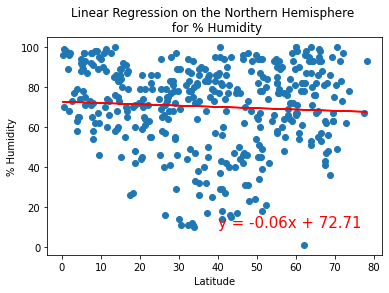

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

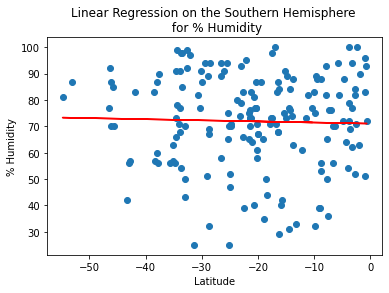

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

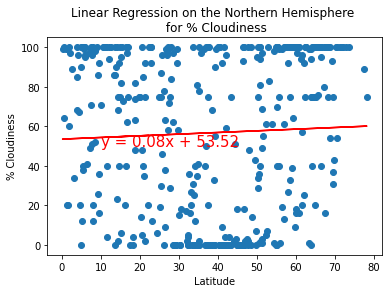

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,50))

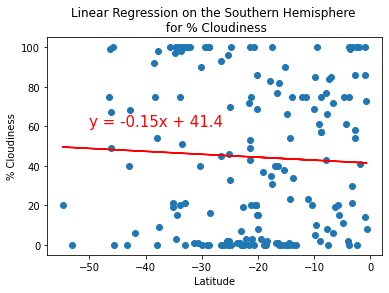

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

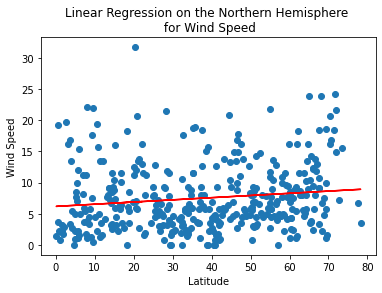

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

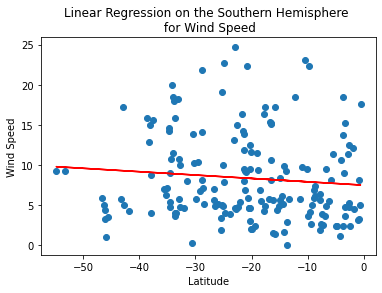

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,35))